# Shallow water model
## HW3
### Kelsey Malloy


### <i>last edited: 11/2020</i>

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from Diagnostics import calc_budget

### Set geometry

In [28]:
nx = 1000 # number of x pts
ny = 1000 # number of y pts
lx = 100000 # length of x
ly = 100000 # length of y
dx = float(lx)/nx # distance between x pts
dy = float(ly)/ny # distance between y pts

# centered grid -- p points
xc = (-lx/2)+np.arange(nx)*(dx)
yc = (-ly/2)+np.arange(ny)*(dy)
YP,XP = np.meshgrid(yc,xc)
print('Centered grid shape (pressure points): ',XP.shape)

# x-staggered grid -- u points
xstag = ((-lx/2)-dx/2)+np.arange(nx+1)*dx
print(xc[:2],xc[-2:],xstag[:2],xstag[-2:])
YU,XU = np.meshgrid(yc,xstag)
print('X-staggered grid shape (u points): ',XU.shape)

# y-staggered grid -- v points
ystag = ((-ly/2)-dy/2)+np.arange(ny+1)*dy
print(yc[:2],yc[-2:],ystag[:2],ystag[-2:])
YV,XV = np.meshgrid(ystag,xc)
print('Y-staggered grid shape (v points): ',XV.shape)

# x-staggered and y-staggered -- z points
YZ,XZ = np.meshgrid(ystag,xstag)
print('X- and Y-staggered grid shape (vort points): ',XZ.shape)

Centered grid shape (pressure points):  (1000, 1000)
[-50000. -49900.] [49800. 49900.] [-50050. -49950.] [49850. 49950.]
X-staggered grid shape (u points):  (1001, 1000)
[-50000. -49900.] [49800. 49900.] [-50050. -49950.] [49850. 49950.]
Y-staggered grid shape (v points):  (1000, 1001)
X- and Y-staggered grid shape (vort points):  (1001, 1001)


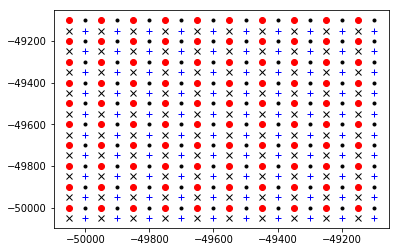

In [29]:
plt.plot(XP[:10,:10],YP[:10,:10],'k.')
plt.plot(XU[:10,:10],YU[:10,:10],'ro')
plt.plot(XV[:10,:10],YV[:10,:10],'b+')
plt.plot(XZ[:10,:10],YZ[:10,:10],'kx')
plt.show()

### Set time step and interval

In [30]:
nt = 100 # number of timesteps
dt = .1 # timestep interval
CFDtest =  0.1*min(dx, dy)/np.sqrt(9.8*150) # test to see if dt is less than CFD limit
print(CFDtest,dt)

0.26082026547865056 0.1


### Set parameters

In [25]:
g=9.8
depth = 150. 
f = 10**-4 
print(depth.shape,f.shape)

(100, 1000, 1000) (100, 1001, 1001)


### Initial conditions

In [40]:
# initialize arrays
p = np.zeros((int(nt),ny,nx))
u = np.zeros((int(nt),ny,nx+1))
v = np.zeros((int(nt),ny+1,nx))
z = np.zeros((int(nt),ny+1,nx+1))
depth = depth + np.zeros((int(nt),ny,nx))
f = f + np.zeros((int(nt),nx+1,ny+1))

print(p.shape,depth.shape)
print(u.shape,v.shape)
print(z.shape,f.shape)

(100, 1000, 1000) (100, 1000, 1000)
(100, 1000, 1001) (100, 1001, 1000)
(100, 1001, 1001) (100, 1001, 1001)


In [41]:
def gauss(X,Y,nx,ny,amp,radius):
    # returns gaussian bubble
    return amp*(np.exp(-((X-nx/2)**2/(2*(radius)**2) + (Y-ny/2)**2/(2*(radius)**2))))

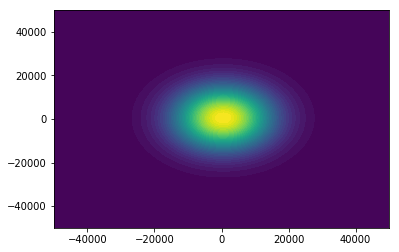

In [42]:
# gaussian bubble for eta
p = gauss(XP,YP,nx,ny,1,10000)
plt.contourf(YP,XP,p,40)

In [ ]:
# initial budget
budgets0 = calc_budget(p,u,v,D+p,f)


In [19]:
nt=20000 # eventually need these many timesteps
nx=320 # number of pts/indices
ny=120 # number of pts/indices
dt= 15*60 # mins --> seconds
lx=160 # length of x
ly=60 # length of y
dxx=float(lx)/nx # dx in lon
dyy=float(ly)/ny # dx in lat
print(dxx,dyy)

# centered grid 
x_pts = 120+np.arange(nx)*dxx # acts like longitude
y_pts = -30+np.arange(ny)*dyy # acts like latitude
Y,X = np.meshgrid(y_pts,x_pts)

# x-staggered grid
x_pts_stag = (120-dxx/2)+np.arange(nx+1)*dxx
print(x_pts[0:2],x_pts[-2:],x_pts_stag[0:2],x_pts_stag[-2:])
YU,XU = np.meshgrid(y_pts,x_pts_stag)
print(XU.shape,YU.shape)

# y-staggered grid
y_pts_stag = (-30-dyy/2)+np.arange(ny+1)*dyy 
print(y_pts[0:2],y_pts[-2:],y_pts_stag[0:2],y_pts_stag[-2:])
YV,XV = np.meshgrid(y_pts_stag,x_pts)
print(XV.shape,YV.shape)

0.5 0.5
[120.  120.5] [279.  279.5] [119.75 120.25] [279.25 279.75]
(321, 120) (321, 120)
[-30.  -29.5] [29.  29.5] [-30.25 -29.75] [29.25 29.75]
(320, 121) (320, 121)


In [20]:
# initialize u,v,h
u = np.zeros((int(nt),nx+1, ny), dtype=np.float) 
v = np.zeros((int(nt),nx, ny+1), dtype=np.float)
h = np.zeros((int(nt),nx,ny), dtype=np.float)
print(u.shape,v.shape,h.shape)

(20000, 321, 120) (20000, 320, 121) (20000, 320, 120)


### other parameters

In [106]:
D = 150. # meters
g = 0.009 # reduced gravity
alpha=6*10**-7 # 1/20 days-- dissipation factor
gamma1=6*10**-7 # same as alpha
gamma2=6*10**-7 # same as alpha
omega=7.29*10**-5
r_e = 6.38*10**6
f0 = 0. # beta-plane
beta=2.28*10**-11

mu= .2 # adjustment for spatial gaussian smoothing

ymU = (YU * 110000) # convert YU and YV to meters from equator
ymV = (YV * 110000)

# longitude/latitude --> meters
dx = dxx*110000 # convert dx to meters
dy = dyy*110000 
print(dx,dy)

CFDtest = 0.1*min(dx, dy)/np.sqrt(g*D) # test to see if dt is less than CFD limit
print(CFDtest,dt)

55000.0 55000.0
4733.646312031287 900


In [107]:
betaU = beta * ymU
betaV = beta * ymV

print(betaU.shape,betaV.shape)

(321, 120) (320, 121)


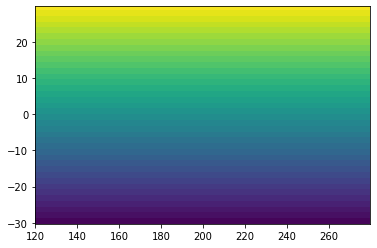

In [108]:
#check beta
plt.contourf(XV,YV,betaV,40)
plt.show()

### building model

In [109]:
# boundary conditions -- walls have no velocity


def BC(t):
    u[t, 0, :] = 0
    u[t, -1, :] = 0
    
    v[t,:, 0] = 0
    v[t,:, -1] = 0
    
    #h[t,:, 0] = h[t,:, 1]
    #h[t,:, -1] = h[t,:, -2]
    #h[t,0, :] = h[t,1, :]
    #h[t,-1, :] = h[t,-2, :]
    


In [110]:
def gauss(X,Y,nx,ny):
    # returns gaussian bubble
    return 1*(np.exp(-((X-nx/2)**2/(2*(10)**2) + (Y-ny/2)**2/(2*(10)**2))))

def centermean(data):
    # Returns the four-point average of shape (ny-1, nx-1).    
    return 0.25*(data[:-1,:-1] + data[:-1,1:] + data[1:, :-1] + data[1:,1:])

def yavg(data):
    # Average adjacent values in the y-dir of shape (ny-1, nx)
    return 0.5*(data[:,:-1] + data[:,1:])

#def xavg(data):
    #Average adjacent values in the x-dir of shape (nx, ny-1)
#    return 0.5*(data[:-1,:] + data[1:,:])

def centered_average_uv(udata,vdata):
    # returns the (4-pt) center mean for both u and v data
    ubar = centermean(udata)[:,:]  
    vbar = centermean(vdata)[:,:]  
    return ubar, vbar

def d_dx(data):
    return (data[1:,:] - data[:-1,:]) / dx

def d_dy(data):
    return (data[:,1:] - data[:,:-1]) / dy

def div(u,v):
    return d_dx(u)[:,:] + d_dy(v)[:,:] # shifted over

def leapfrog(fulldata,t):
    # leapfrog method for time-differencing stability
    
    if (fulldata[t].shape) == [X,Y]:
        fulldata[t] = fulldata[t] + 0.6*(fulldata[t-1] - (2.*fulldata[t]) + fulldata[t+1])
    elif (fulldata[t].shape) == [XU,YU]:
        fulldata[t,1:-1,:] = fulldata[t,1:-1,:] + 0.6*(fulldata[t-1,1:-1,:] - (2.*fulldata[t,1:-1,:]) + fulldata[t+1,1:-1,:])
    else:
        fulldata[t,:,1:-1] = fulldata[t,:,1:-1] + 0.6*(fulldata[t-1,:,1:-1] - (2.*fulldata[t,:,1:-1]) + fulldata[t+1,:,1:-1])
    return fulldata[t]

In [111]:
# initial pertubation
h[1] = gauss(X, Y,400,0)
print(np.max(h[1]))

1.0


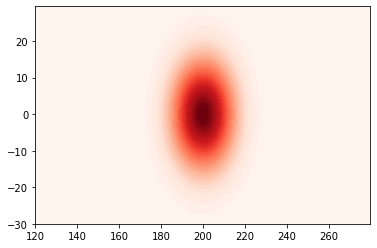

In [112]:
# see what t=0 inital pertubation looks like
plt.contourf(X,Y,h[1],np.linspace(0,1,40),cmap='Reds')
plt.show()

In [113]:
# test first timestep

t=1

BC(t)

print('h shape: '+str(h[t].shape))
print('u shape: '+str(u[t,1:-1,:].shape))
print('v shape: '+str(v[t,:,1:-1].shape))

ubar,vbar = centered_average_uv(u[t],v[t]) 

divuv = div(u[t],v[t])

dh_dx = d_dx(h[t])[:,:]
dh_dy = d_dy(h[t])[:,:] 

bU = betaU[1:-1,:]
bV = betaV[:,1:-1]

print('ubar and vbar shape: '+ str(ubar.shape)+str(vbar.shape))
print('div shape: '+ str(divuv.shape))
print('dhdx and dhdy shape: '+ str(dh_dx.shape)+str(dh_dy.shape))
print('betaU,betaV :' + str(bU.shape)+str(bV.shape))

h[t+1] = (h[t-1]*(1 - 2.*alpha*dt)) - (2.*dt*D*divuv)
u[t+1,1:-1,:] = u[t-1,1:-1,:] - (2.*dt*gamma1*u[t-1,1:-1,:]) - (2.*dt*g*dh_dx) + (2.*dt*(f0+bU)*vbar)
v[t+1,:,1:-1] = v[t-1,:,1:-1] - (2.*dt*gamma2*v[t-1,:,1:-1]) - (2.*dt*g*dh_dy) - (2.*dt*(f0+bV)*ubar)

h shape: (320, 120)
u shape: (319, 120)
v shape: (320, 119)
ubar and vbar shape: (320, 119)(319, 120)
div shape: (320, 120)
dhdx and dhdy shape: (319, 120)(320, 119)
betaU,betaV :(319, 120)(320, 119)


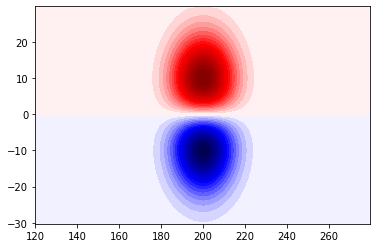

In [114]:
# see whatinital pertubation response looks like

plt.contourf(XV,YV,v[2],40,cmap='seismic')
plt.show()

In [115]:
for t in range(2,nt-1):
    if t % 500 ==0: 
        print(np.max(np.abs(h[t]))) # see status
     
    BC(t)
    
    # temporal smoothing
    if t%17 ==0: # every 17 timesteps
        #print('smoothing')
        
        # temporal smoothing
#         h[t+1] = h[t+1] + 0.5*(h[t]+h[t-1]) 
#         u[t+1,1:-1,:] = u[t+1,1:-1,:] + 0.5*(u[t,1:-1,:]+u[t-1,1:-1,:])
#         v[t+1,:,1:-1] = v[t+1,:,1:-1] + 0.5*(v[t,:,1:-1]+v[t-1,:,1:-1])
        
        u[t] = leapfrog(u,t) 
        v[t] = leapfrog(v,t) 
        h[t] = leapfrog(h,t) 

         # spatial smoothing   

        u[t+1]=gaussian_filter(u[t+1],sigma=mu)
        v[t+1]=gaussian_filter(v[t+1],sigma=mu)
        h[t+1]=gaussian_filter(h[t+1],sigma=mu)

    else:

        ubar,vbar = centered_average_uv(u[t],v[t]) 

        divuv = div(u[t],v[t])

        dh_dx = d_dx(h[t])[:,:]
        dh_dy = d_dy(h[t])[:,:] 

        bU = betaU[1:-1,:]
        bV = betaV[:,1:-1]

        h[t+1] = (h[t-1]*(1 - 2.*alpha*dt)) - (2.*dt*D*divuv)
        u[t+1,1:-1,:] = u[t-1,1:-1,:] - (2.*dt*gamma1*u[t-1,1:-1,:]) - (2.*dt*g*dh_dx) + (2.*dt*(f0+bU)*vbar)
        v[t+1,:,1:-1] = v[t-1,:,1:-1] - (2.*dt*gamma2*v[t-1,:,1:-1]) - (2.*dt*g*dh_dy) - (2.*dt*(f0+bV)*ubar)

         # spatial smoothing   

        u[t+1]=gaussian_filter(u[t+1],sigma=mu)
        v[t+1]=gaussian_filter(v[t+1],sigma=mu)
        h[t+1]=gaussian_filter(h[t+1],sigma=mu)
        


10.05286829428988
192.62905473034374
39490.571379160465
228020.64372988793
1193913.1904963176
1364480.0755539776
529897.9497292973
1281544.6797490362
1491360.0574028853
430941.67960792186
790374.1736051262
1112422.8661653725
472334.21704704553
315101.40017995384
656823.6888027998
412128.21271454485
169040.4927356605
342741.9640088273
286590.4216096362
93467.2961274143
152891.8744209165
168388.96934802042
82301.55649943123
85906.22820583706
89301.26353145724
74154.3048599295
63598.97548969777
55065.46110210234
45294.82437492494
36387.86084474904
43726.31142773823
29004.17420748064
17683.907919784557
19200.864529091083
15354.852926325739
13061.720380639921
11332.094507961503
9888.05480981151
8050.541729925054


### PLOTTING (the biggest mess of the code)

In [45]:
cmap1,cmap2 = 'Reds','seismic'

ulevs = 40#np.arange(-.025,0.025+.001,.001)

1.840186868564639 -1.8416605391404


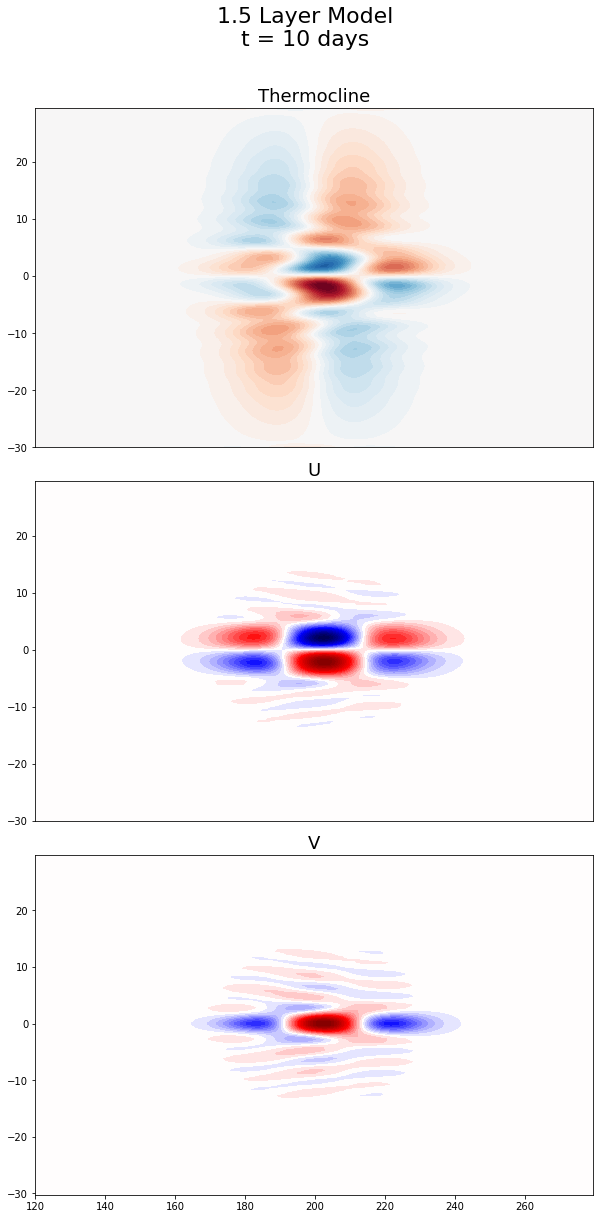

1595.3282349145468 -1595.4197230124066


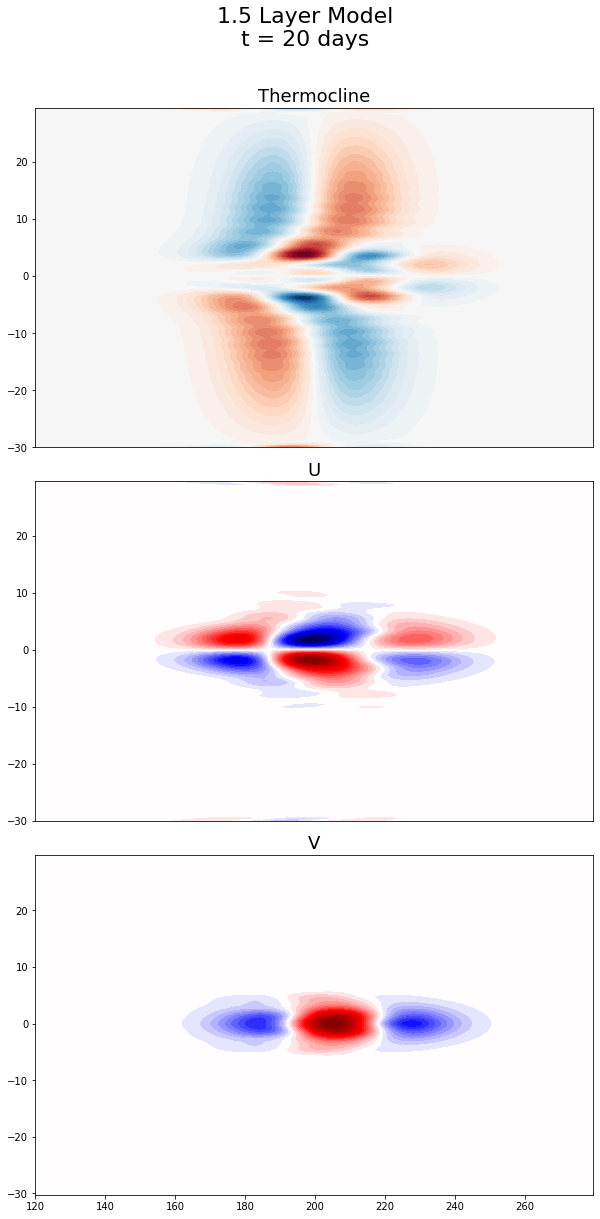

5020.418504967136 -5020.425428607498


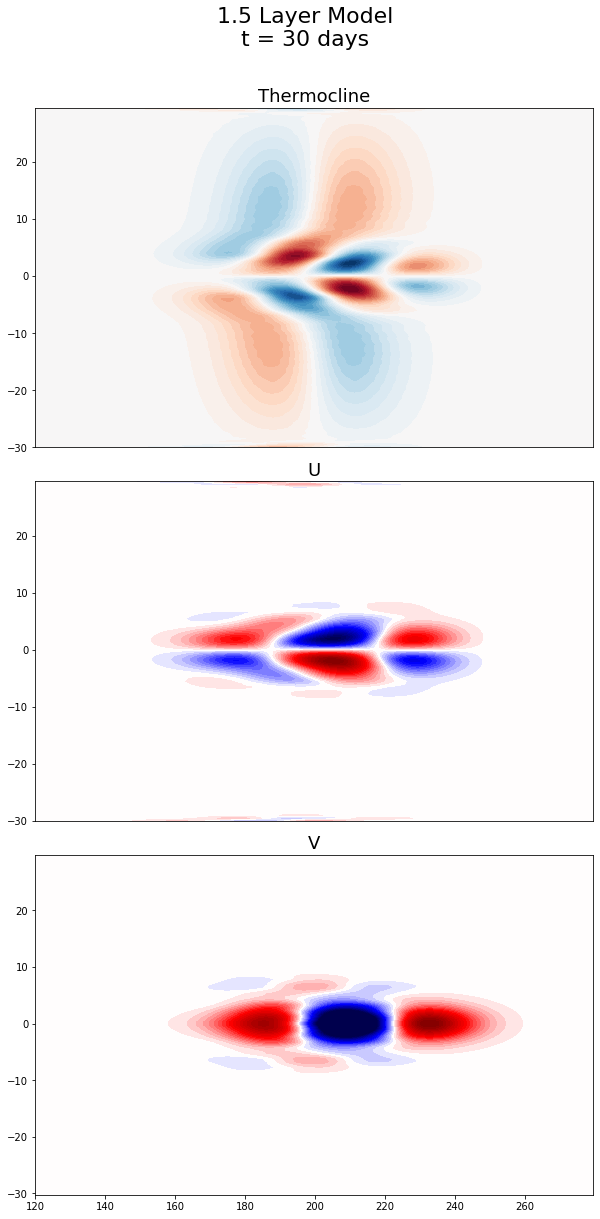

14076.431236553626 -14076.3929112214


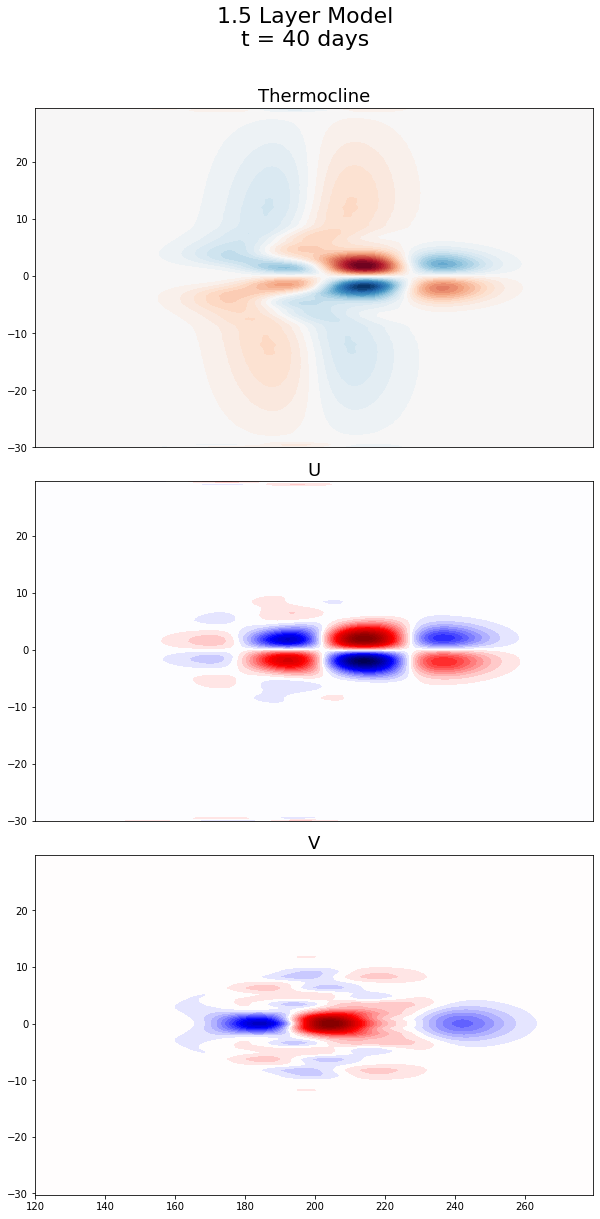

5608.280412951577 -5608.270970187174


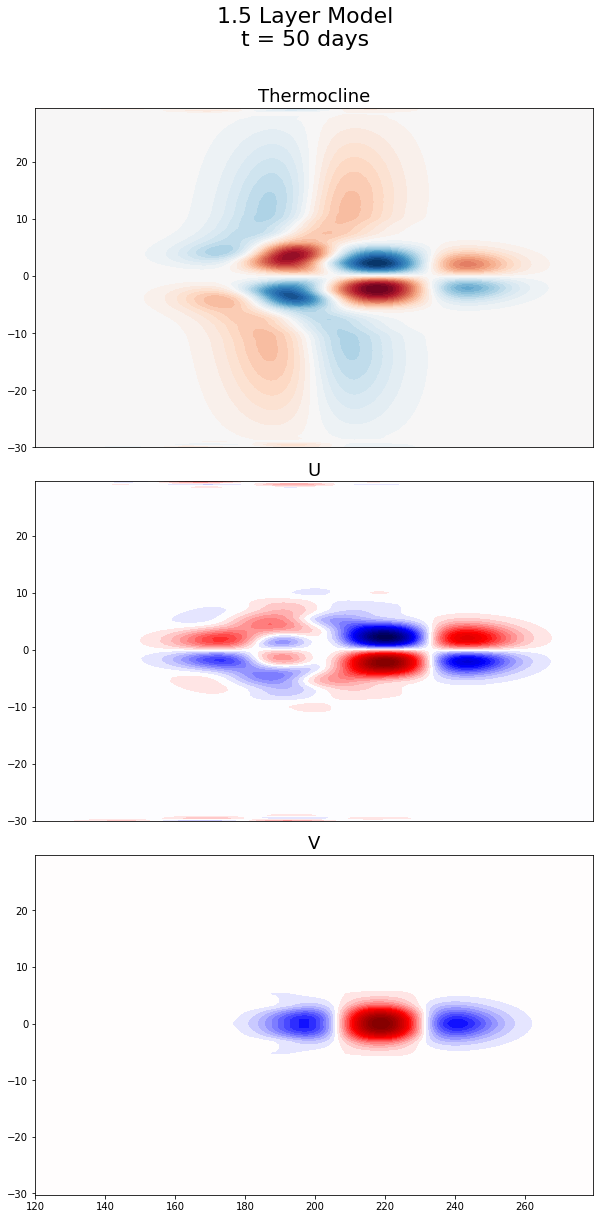

3581.7995207232016 -3581.8029553252113


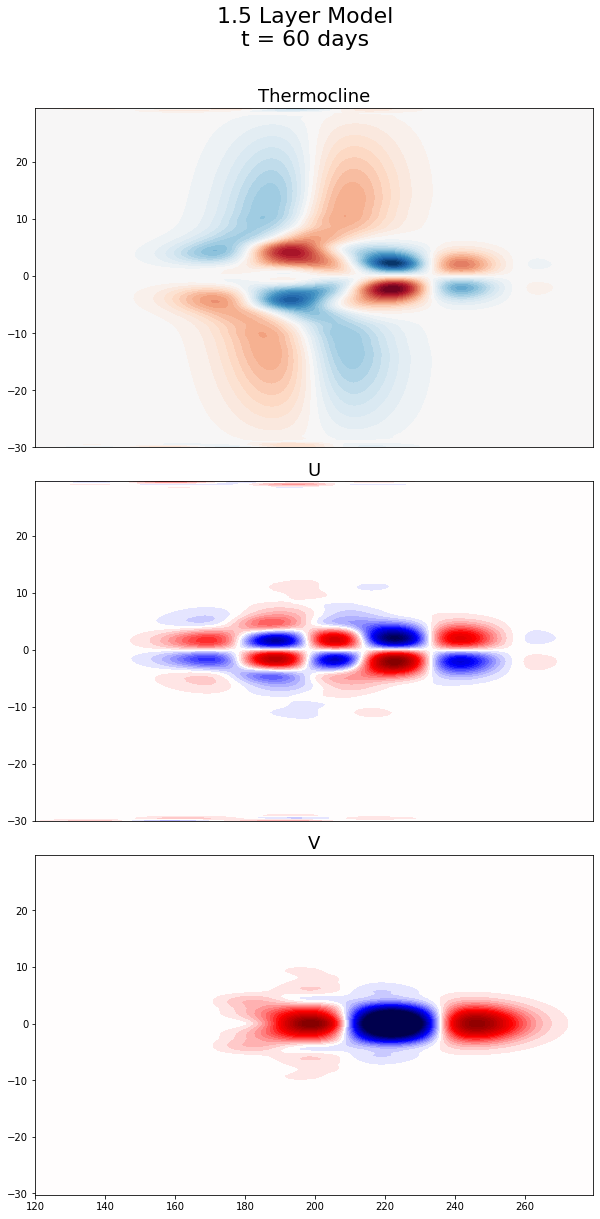

6737.807853748128 -6737.8099814544175


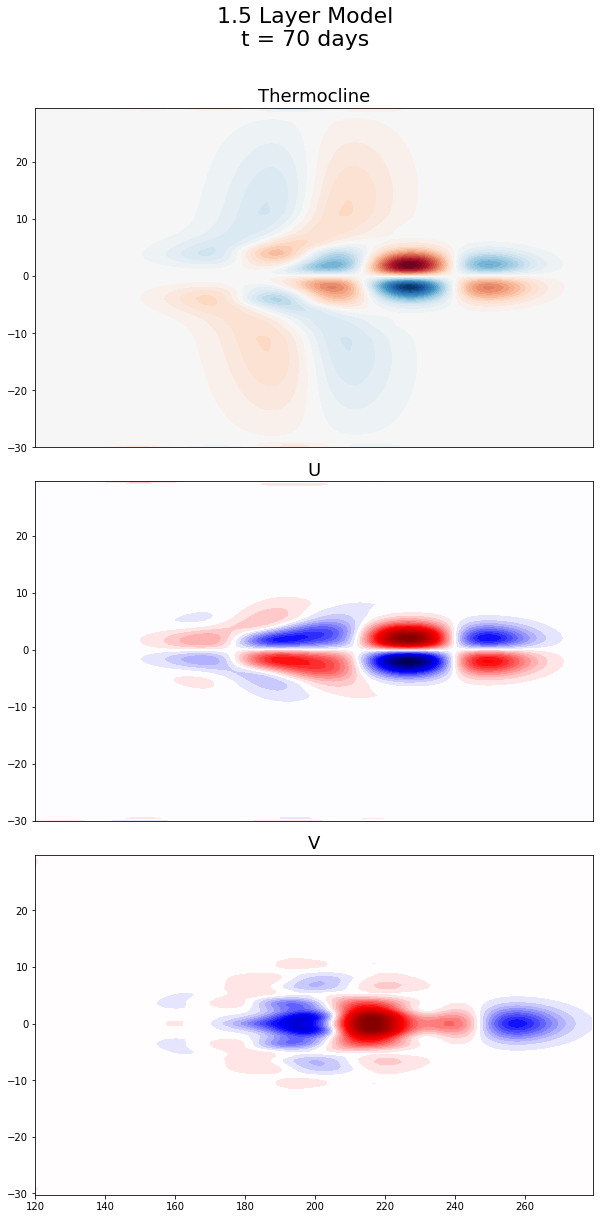

2636.001859713706 -2636.0009569121175


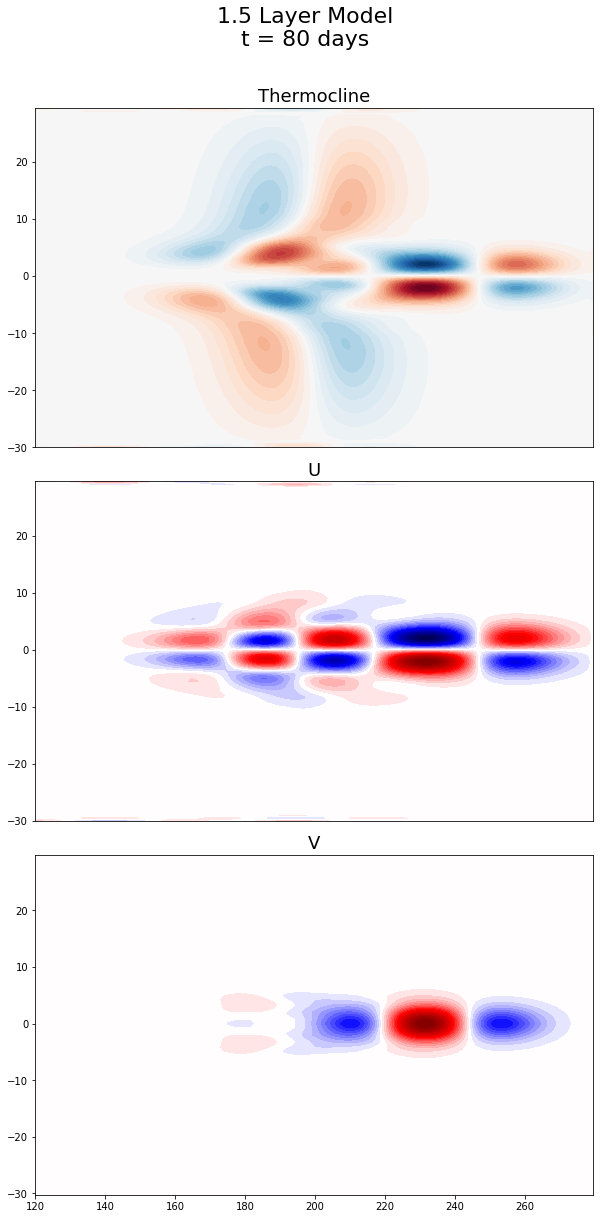

1589.7585454713267 -1589.7568757456331


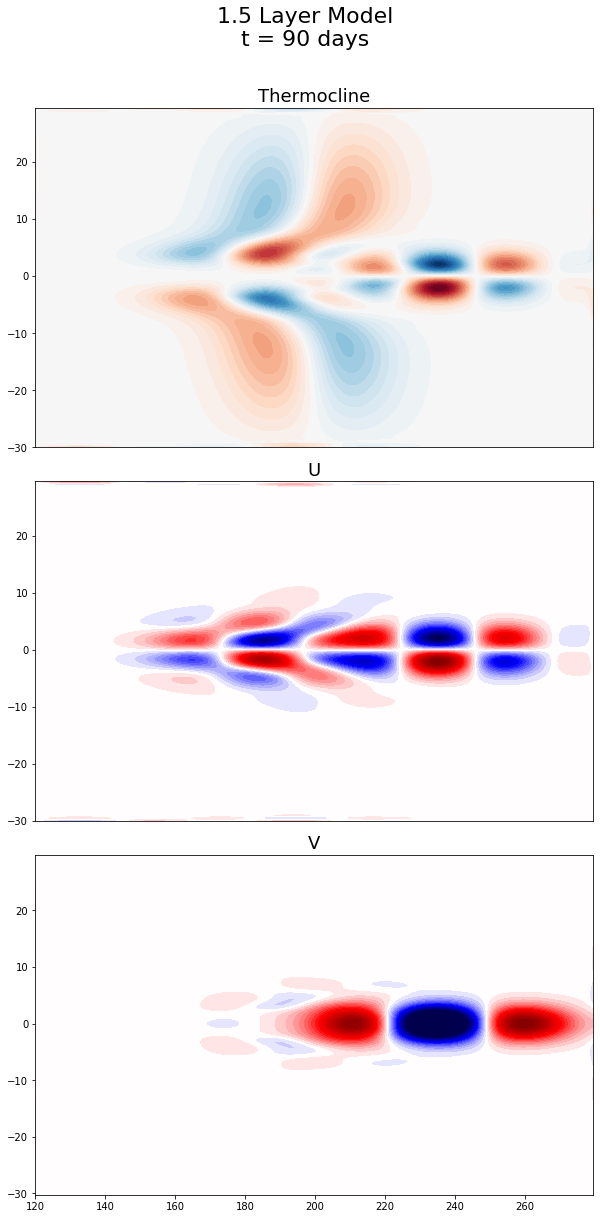

2332.228346240517 -2332.227369023112


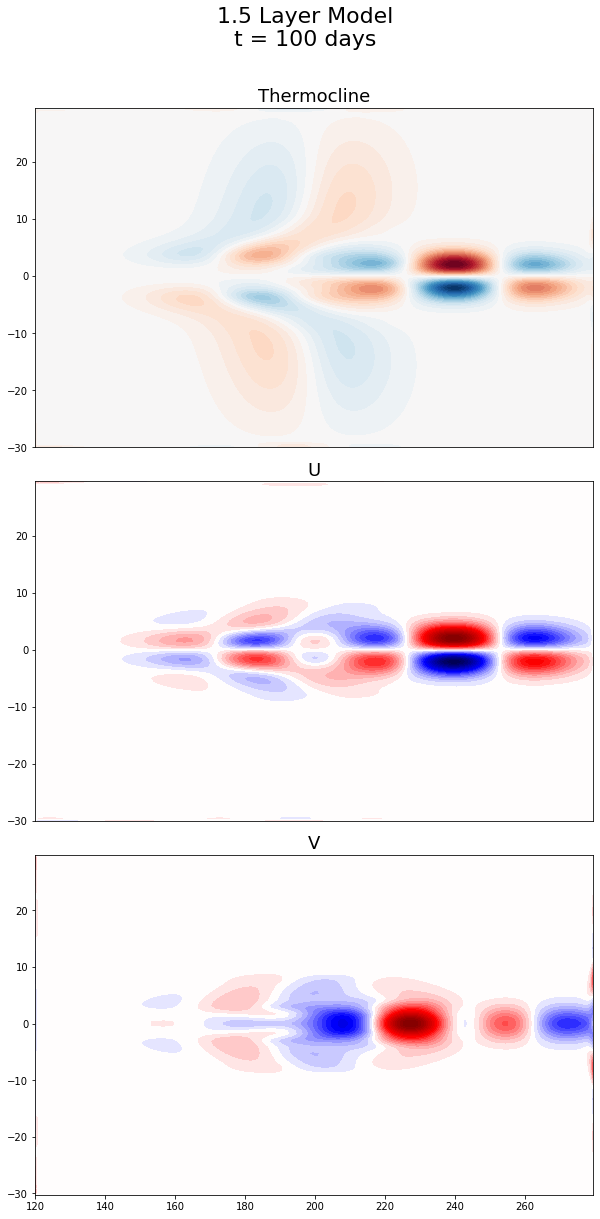

807.6965568002579 -807.6963884631969


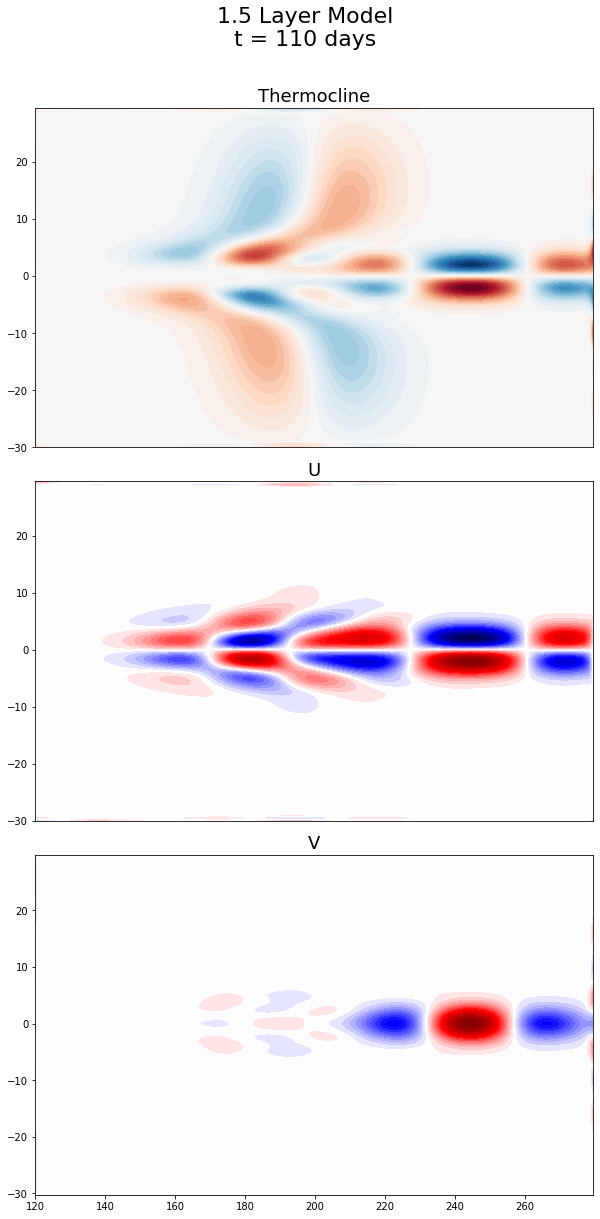

532.3978288977847 -532.3980267837877


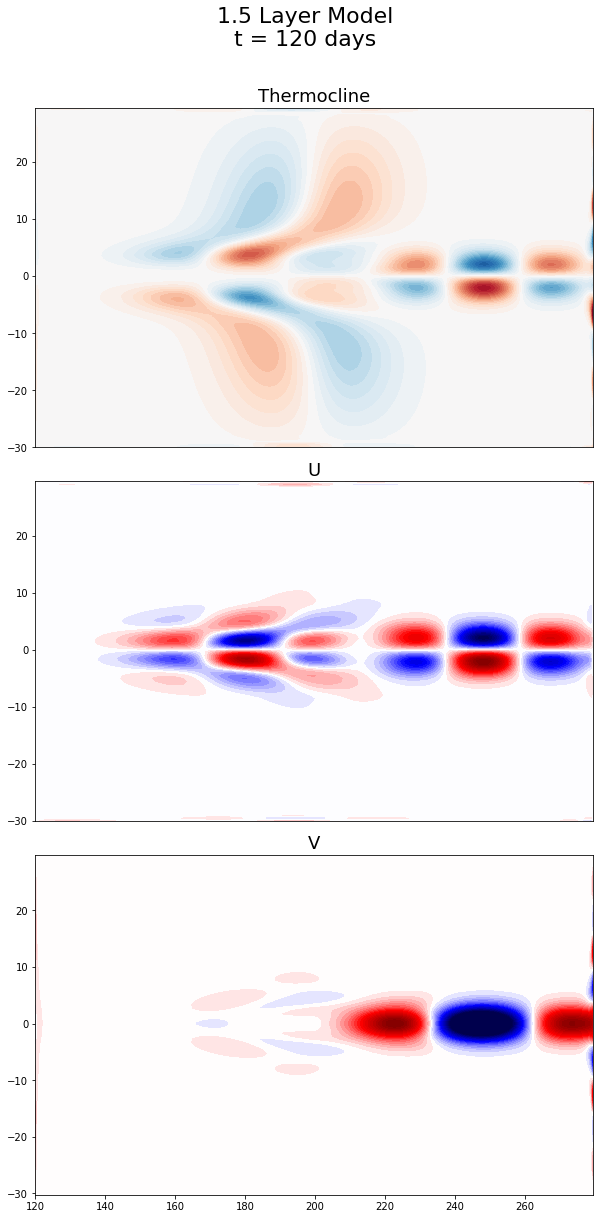

699.8775893788262 -699.8777843849902


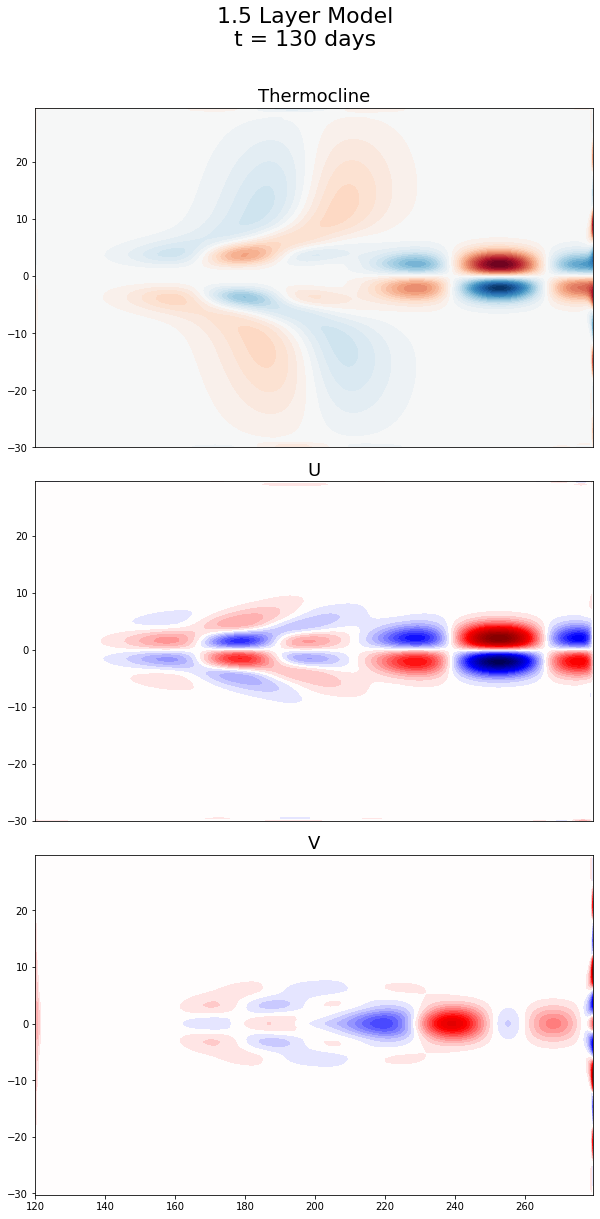

214.9683298734185 -215.4320304371012


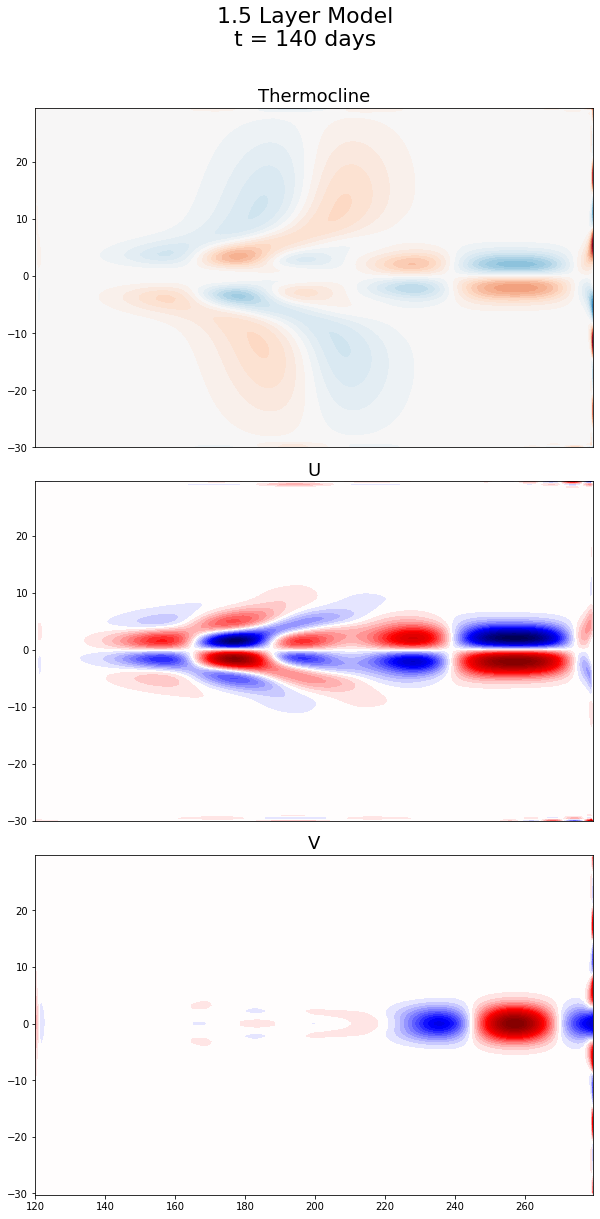

193.2670790831858 -192.8814979728833


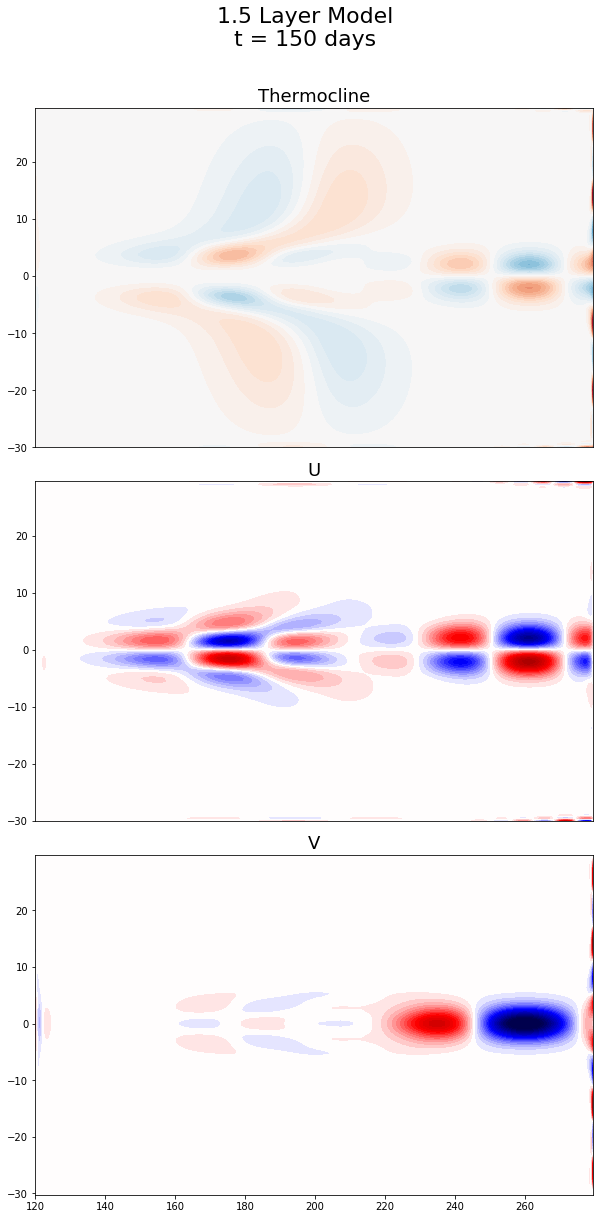

193.095396619573 -193.09584764640059


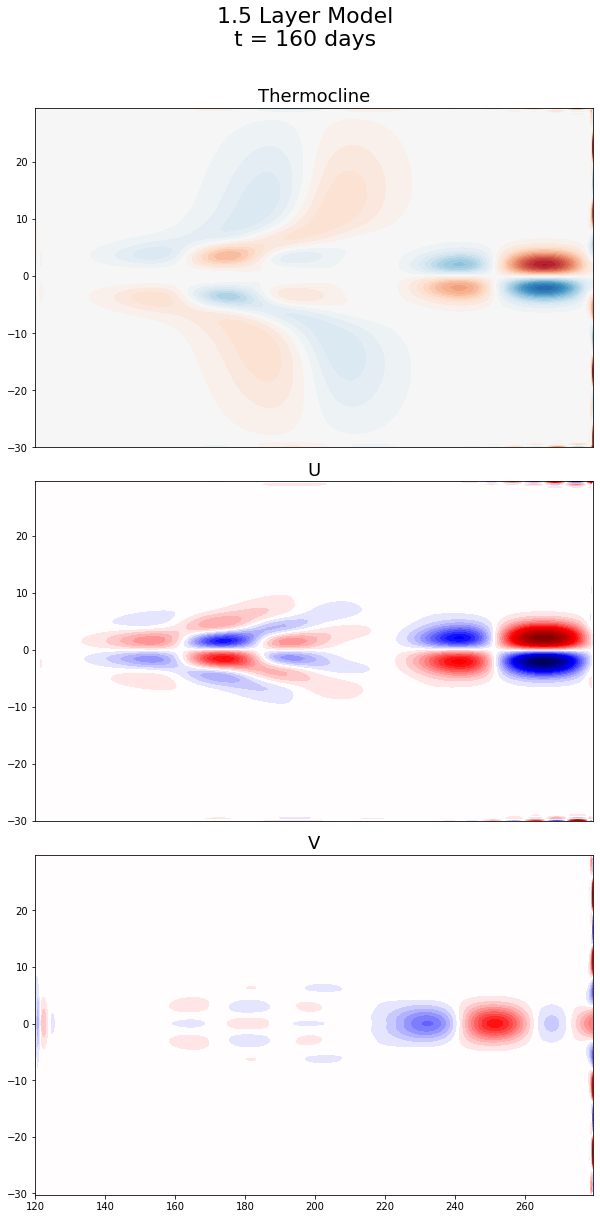

158.94534276228626 -149.37145031226277


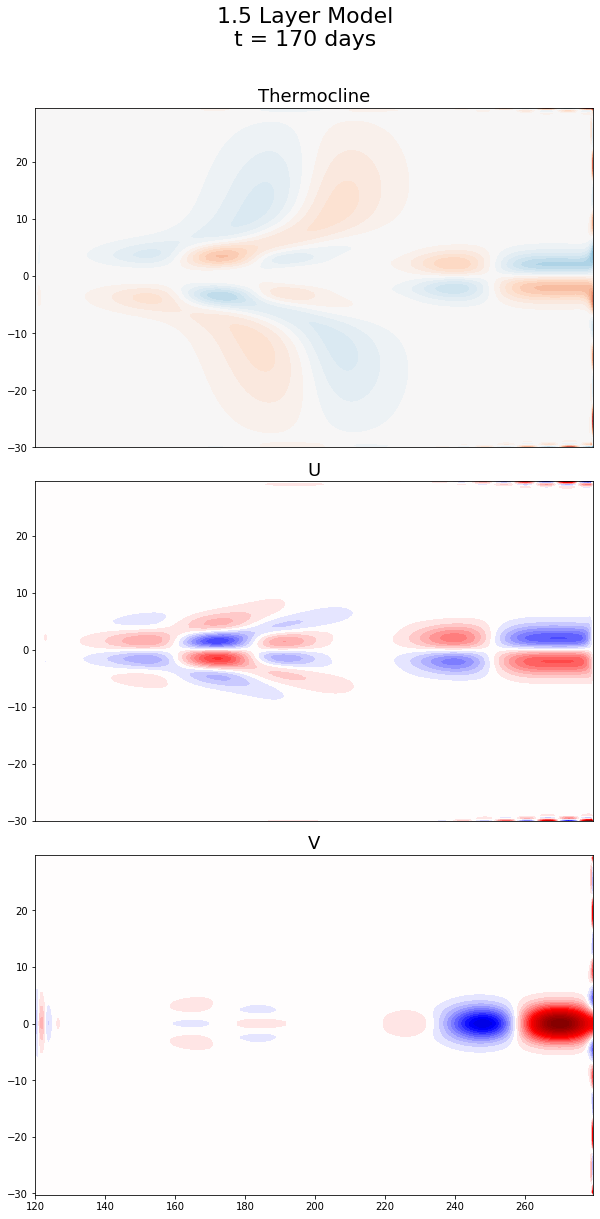

95.83400537607494 -96.04797582515552


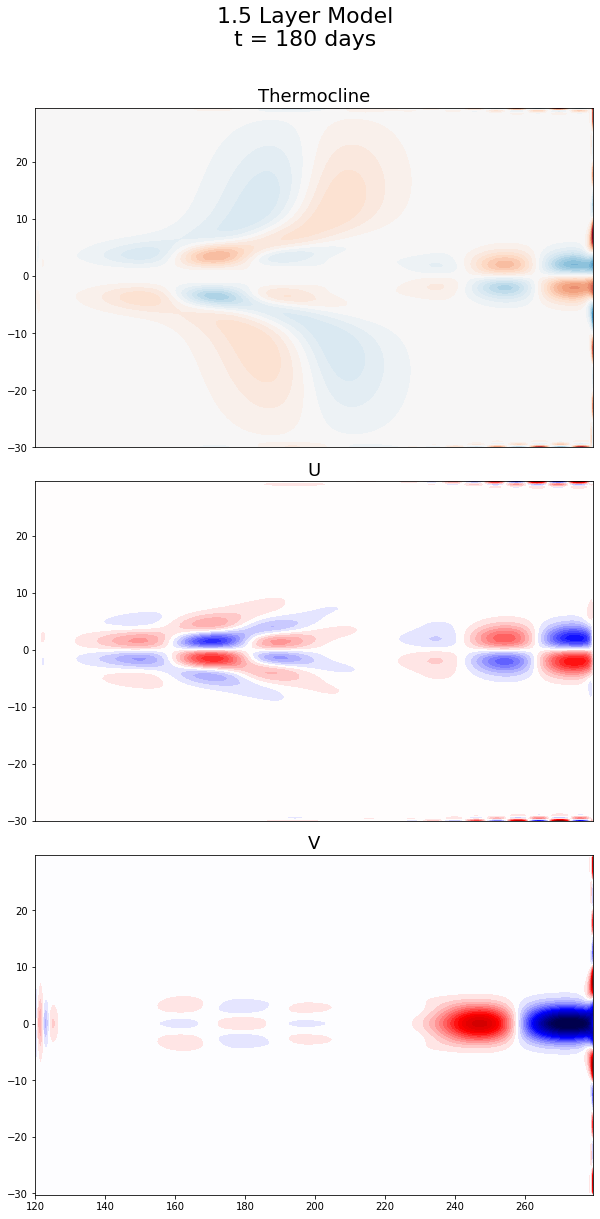

61.3395591688998 -61.47395501154358


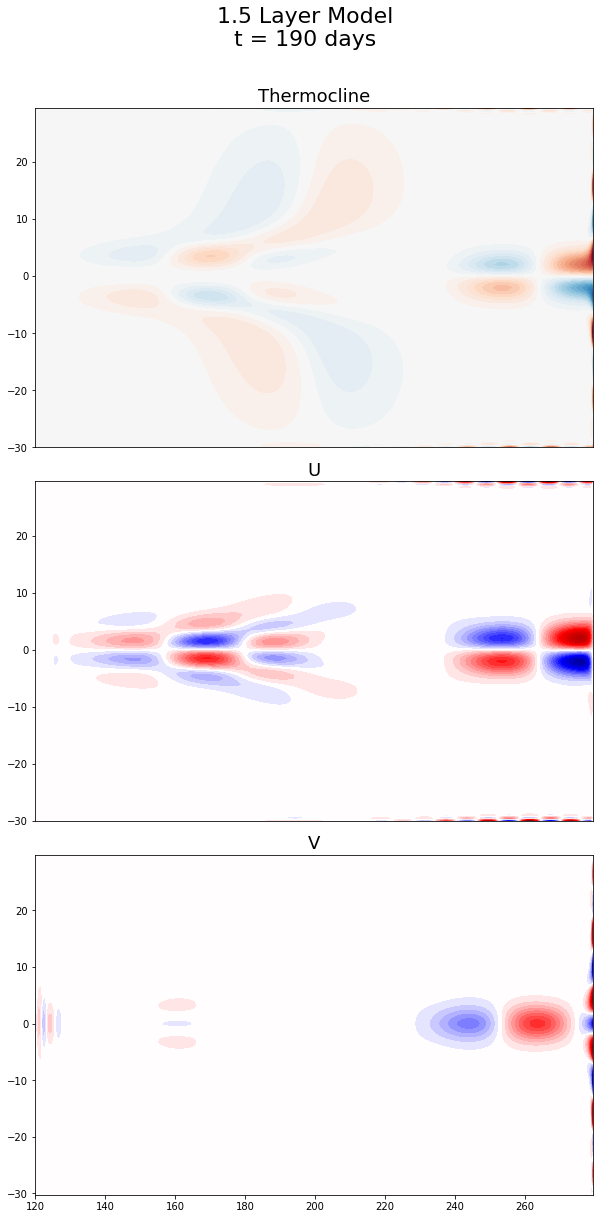

39.17049188803676 -39.25604497441661


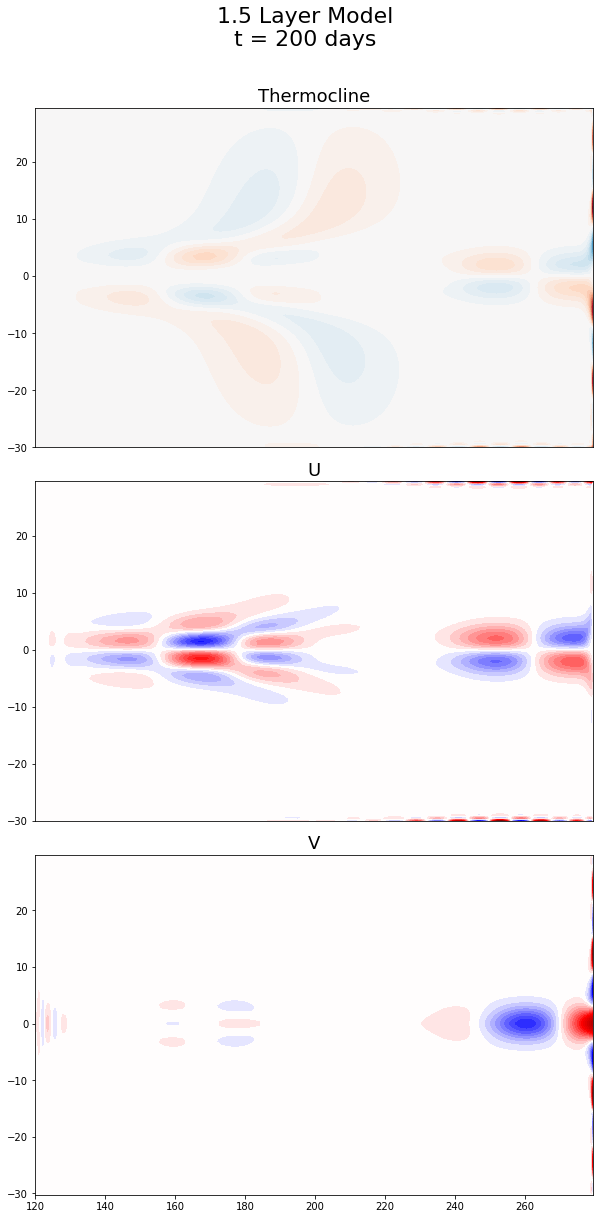

IndexError: index 20160 is out of bounds for axis 0 with size 20000

In [116]:
# see snapshots every 10 days
for idx in range(1,40):
    t=960*idx
    day= ((t*dt) / 86400.)
    uplot = u[t] 
    hplot = h[t] 
    vplot = v[t] 
    print(uplot.max(),uplot.min())

    fig = plt.figure(figsize=[10,20])
    st = fig.suptitle('1.5 Layer Model\nt = '+str(int(day))+' days' , fontsize=22)

    ax1 = fig.add_subplot(311)
    #y,x = np.meshgrid(y_pts,x_pts)
    cs=ax1.contourf(X,Y,hplot,np.linspace(-1*np.max(hplot),np.max(hplot),40,endpoint=True),cmap='RdBu_r',extend='both')
    ax1.set_title('Thermocline',fontsize=18)
    ax1.set_xticks([])

    ax2 = fig.add_subplot(312)
    #y,x = np.meshgrid(y_pts,x_pts)
    cs2=ax2.contourf(XU,YU,uplot,np.linspace(-1*np.max(uplot),np.max(uplot),40,endpoint=True),cmap=cmap2,extend='both')
    ax2.set_title('U',fontsize=18)
    ax2.set_xticks([])

    ax3 = fig.add_subplot(313)
    #y,x = np.meshgrid(y_pts,x_pts)
    cs3=ax3.contourf(XV,YV,vplot,np.linspace(-1*np.max(vplot),np.max(vplot),40,endpoint=True),cmap=cmap2,extend='both')
    ax3.set_title('V',fontsize=18)

    #cbaxes = fig.add_axes([0.92, 0.65, 0.025, 0.225])
    #cb = plt.colorbar(cs,orientation='vertical', cax = cbaxes)
    #cb.ax.set_ylabel('m',fontsize=14)
    #cb.ax.tick_params(labelsize=12) 

    #cbaxes2 = fig.add_axes([0.92, 0.26, 0.025, 0.225])
    #cb2 = plt.colorbar(cs2,orientation='vertical', cax = cbaxes2)
    #cb2.ax.set_ylabel('m s$^-$$^1$',fontsize=14)
    #cb2.ax.tick_params(labelsize=12) 

    plt.subplots_adjust(top=0.88,wspace=0.05, hspace=0.1)
    st.set_y(0.95)

    plt.show()
    #plt.savefig('1pt5_SWM_'+str(int(day)).zfill(3)+'.png')
    #print('1pt5_SWM_'+str(int(day)).zfill(3)+'.png')

In [ ]:
print(h.shape)

In [ ]:
# since my model is technically unstable.... I have to normalize it to get any type of signal for the next plot
hnew=np.zeros(h.shape)
#print(h.shape)
for idx in range(0,29759):
    
    day= ((idx*dt) / 86400.)
    #print(h[t])

    val = h[idx].max()
    #print(val)
    hnew[idx] = h[idx] / val

    #print(hnew[idx].max(),hnew[idx].min())

In [ ]:
hplot=hnew[:,:,-1]
t_pts=np.arange((0*dt)/86400,(29759*dt)/86400 + (dt/86400),dt/86400) # axis is in days
print(t_pts.shape)
X,T = np.meshgrid(x_pts,t_pts)
levs= np.linspace(-1,1,40,endpoint=True)

In [ ]:
fig = plt.figure(figsize=[10,20])
#st = fig.suptitle('H at lat=0\n' , fontsize=22)

ax1 = fig.add_subplot(111)
cs=ax1.contourf(X,T,hplot,levs,cmap='RdBu_r',extend='both')
ax1.set_title('H at NB\n',fontsize=22)
ax1.set_yticks([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
ax1.set_xlabel('Longitude',fontsize=18)
ax1.set_ylabel('Time (days)',fontsize=18)

#plt.subplots_adjust(top=0.91,wspace=0.05, hspace=0.1)
#st.set_y(0.95)

#plt.show()
plt.savefig('1pt5_H_NB.png')